<a href="https://colab.research.google.com/github/B-Alhousani/Sentimant_Arabic_analysis/blob/main/Sentimant_Arabic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1.Import librares**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import ISRIStemmer
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import networkx as nx
! pip install python-bidi arabic_reshaper
import arabic_reshaper
from bidi.algorithm import get_display
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 10000

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**2.Reading data**

In [ ]:
#read the data

df = pd.read_excel('/content/reviews.xlsx')

In [ ]:
#check the number of columns and rows in the data
df.shape

(2500, 2)

In [ ]:
#check if the data was read successfully
df

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه    
1                المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الرمضاني. المكان نظيف جدا و مرتب والخدمه ممتازه .. نظام البوفيه حلو .. بتم توزيع المقبلات على الطاولات حسب العدد الموجود .. وبتشكيله متنوعه وكميات معقوله والصحن اللي بفضى بتم تبديله مباشره اذا بتحب .. العصائر ما فيها تشكيل يعني تمر هندي او جلاب ... بالنسبه للوجبات الرئيسيه الموجوده تشكيلتها جيده وتقريبا 8 انواع بين الكفته و الكبه اللبنيه والمعكرونه والرز و المندي ..والحلو انه كل يوم عندهم جدول بالبوفيه الموجود ومكوناته ..يعني ممكن تختار اليوم اللي بعجبك .. الحلو نوع واحد ... والفواكه بطيخ و شمام .. اﻷكل بشكل عام طعمه طيب وزاكي والمطعم مرتب ما في ازمه عالبوفيه ولا فيه فوضى .. سعر البوفيه 17 دينار للكبار و الصغار 8 دنانير .. يعني بشكل عام لازم الواحد يروح يجربه ..    
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   سناكاته زاكية سعره سعر السوق ..احلى ما في الموضوع انه في خدمة توصيل ..    
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           بهارات البروستد كتير مميزة ومش ناقصها اشي , والاكل كان مستوي منيح بهارات البطاطا كمان كتير طيبة اسعارو رخيصة مقارنة مع محلات البروستد التانيين بنصح الكل يجربو    
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    هاد الفرع مش تابع لشاورما الريم الاصلي فروع شاورما الريم المعروفة جبل عمان / شارع عبدالله غوشة / شارع المدينة المنورة /الصوفية هاد ماخد اسم الريم فقط    
5                                                                                                                                                                                                                                                                                                                            

#**3. Data Preprocessing**

###**Handle null values & duplicates**

In [ ]:
#check for the null values in the dataset
df.isnull().sum()

Text     0
Class    0
dtype: int64

In [ ]:
#number of duplicates
df.duplicated().sum()

19

In [ ]:
#drop all the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#check the duplicates
df.duplicated().sum()

0

###**Removing Punctuations**

In [ ]:
#Function for removing the punctuations
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
# apply the function in our data set
df['Text'] = df['Text'].apply(remove_punctuation)

In [ ]:
#check if the punctauation has removed
df['Text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه 
1                                               المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الرمضاني المكان نظيف جدا و مرتب والخدمه ممتازه  نظام البوفيه حلو  بتم توزيع المقبلات على الطاولات حسب العدد الموجود  وبتشكيله متنوعه وكميات معقوله والصحن اللي بفضى بتم تبديله 

###**Tokenization**

In [ ]:
#we did tokenization to the data word_tokenize to split the sentences into word
df['token'] = df['Text'].apply(word_tokenize)
df.head()

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه    
1  المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الرمضاني المكان نظيف جدا و مرتب والخدمه ممتازه  نظام البوفيه حلو  بتم توزيع المقبلات على الطاولات حسب العدد الموجود  وبتشكيله متنوعه وكميات معقوله والصحن اللي بفضى بتم تبديله مباشره اذا بتحب  العصائر ما فيها تشكيل يعني تمر هندي او جلاب  بالنسبه للوجبات الرئيسيه الموجوده تشكيلتها جيده وتقريبا 8 انواع بين الكفته و الكبه اللبنيه والمعكرونه والرز و المندي والحلو انه كل يوم عندهم جدول بالبوفيه الموجود ومكوناته يعني ممكن تختار اليوم اللي بعجبك  الحلو نوع واحد  والفواكه بطيخ و شمام  اﻷكل بشكل عام طعمه طيب وزاكي والمطعم مرتب ما في ازمه عالبوفيه ولا فيه فوضى  سعر البوفيه 17 دينار للكبار و الصغار 8 دنانير  يعني بشكل عام لازم الواحد يروح يجربه     
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            سناكاته زاكية سعره سعر السوق احلى ما في الموضوع انه في خدمة توصيل     
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 بهارات البروستد كتير مميزة ومش ناقصها اشي  والاكل كان مستوي منيح بهارات البطاطا كمان كتير طيبة اسعارو رخيصة مقارنة مع محلات البروستد التانيين بنصح الكل يجربو    
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            هاد الفرع مش تابع لشاورما الريم الاصلي فروع شاورما الريم المعروفة جبل عمان  شارع عبدالله غوشة  شارع المدينة المنورة الصوفية هاد ماخد اسم الريم فقط    

   Class  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

##**remove stop words**

In [ ]:
# see the stopwords in arabic and I see that they enough
stop_words = set(stopwords.words('arabic'))
print(stop_words)

{'كأنّ', 'عَدَسْ', 'ولو', 'أبٌ', 'يونيو', 'أيّ', 'صباح', 'هي', 'وراءَك', 'خاصة', 'حقا', 'إمّا', 'أو', 'ليستا', 'هاكَ', 'حار', 'انبرى', 'ذي', 'إذاً', 'إياه', 'تانِ', 'كذا', 'إيهٍ', 'أولالك', 'أيا', 'أفعل به', 'ب', 'سرعان', 'غدا', 'مارس', 'علم', 'رأى', 'ثمنمئة', 'وهب', 'آهِ', 'عشر', 'بيد', 'باء', 'جلل', 'ل', 'وهو', 'أولاء', 'ت', 'ث', 'بهن', 'أمد', 'بات', 'حَذارِ', 'نفس', 'كلَّا', 'تسعين', 'أول', 'مادام', 'هيّا', 'لي', 'أربعمئة', 'تِه', 'أرى', 'شرع', 'يفعلون', 'قد', 'بل', 'تحت', 'شمال', 'ين', 'تلكما', 'وُشْكَانَ', 'منه', 'ص', 'أل', 'إذما', 'فيما', 'واهاً', 'شين', 'آهٍ', 'صراحة', 'سبعون', 'أيها', 'لسنا', 'هاتان', 'و', 'كم', 'أيار', 'تلكم', 'جيم', 'عيانا', 'وا', 'ى', 'كان', 'أنت', 'صدقا', 'ثامن', 'ذانك', 'كلتا', 'هذان', 'مافتئ', 'ومن', 'ثمَّ', 'أغسطس', 'تحوّل', 'اللتان', 'هَذِه', 'مليم', 'ثلاثين', 'ترك', 'آها', 'ألفى', 'إليكما', 'ّأيّان', 'ثلاثاء', 'ذوا', 'أيضا', 'ز', 'هاك', 'دينار', 'كأيّن', 'آض', 'الآن', 'لام', 'نيسان', 'نحن', 'جوان', 'إنه', 'ذهب', 'لبيك', 'بماذا', 'تشرين', 'التي', 'لكن',

In [ ]:
#Remove stop words
stop_words = set(stopwords.words('arabic'))
df['stop_words_removed'] = df['token'].apply(lambda x: " ".join(i for i in x if i not in stop_words))
df.head()

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه    
1  المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الرمضاني المكان نظيف جدا و مرتب والخدمه ممتازه  نظام البوفيه حلو  بتم توزيع المقبلات على الطاولات حسب العدد الموجود  وبتشكيله متنوعه وكميات معقوله والصحن اللي بفضى بتم تبديله مباشره اذا بتحب  العصائر ما فيها تشكيل يعني تمر هندي او جلاب  بالنسبه للوجبات الرئيسيه الموجوده تشكيلتها جيده وتقريبا 8 انواع بين الكفته و الكبه اللبنيه والمعكرونه والرز و المندي والحلو انه كل يوم عندهم جدول بالبوفيه الموجود ومكوناته يعني ممكن تختار اليوم اللي بعجبك  الحلو نوع واحد  والفواكه بطيخ و شمام  اﻷكل بشكل عام طعمه طيب وزاكي والمطعم مرتب ما في ازمه عالبوفيه ولا فيه فوضى  سعر البوفيه 17 دينار للكبار و الصغار 8 دنانير  يعني بشكل عام لازم الواحد يروح يجربه     
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            سناكاته زاكية سعره سعر السوق احلى ما في الموضوع انه في خدمة توصيل     
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 بهارات البروستد كتير مميزة ومش ناقصها اشي  والاكل كان مستوي منيح بهارات البطاطا كمان كتير طيبة اسعارو رخيصة مقارنة مع محلات البروستد التانيين بنصح الكل يجربو    
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            هاد الفرع مش تابع لشاورما الريم الاصلي فروع شاورما الريم المعروفة جبل عمان  شارع عبدالله غوشة  شارع المدينة المنورة الصوفية هاد ماخد اسم الريم فقط    

   Class  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

##**apply stemming**

In [ ]:
#do stemming in the
st = ISRIStemmer()
df['stemming'] = df['stop_words_removed'] .apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.head()

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه    
1  المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الرمضاني المكان نظيف جدا و مرتب والخدمه ممتازه  نظام البوفيه حلو  بتم توزيع المقبلات على الطاولات حسب العدد الموجود  وبتشكيله متنوعه وكميات معقوله والصحن اللي بفضى بتم تبديله مباشره اذا بتحب  العصائر ما فيها تشكيل يعني تمر هندي او جلاب  بالنسبه للوجبات الرئيسيه الموجوده تشكيلتها جيده وتقريبا 8 انواع بين الكفته و الكبه اللبنيه والمعكرونه والرز و المندي والحلو انه كل يوم عندهم جدول بالبوفيه الموجود ومكوناته يعني ممكن تختار اليوم اللي بعجبك  الحلو نوع واحد  والفواكه بطيخ و شمام  اﻷكل بشكل عام طعمه طيب وزاكي والمطعم مرتب ما في ازمه عالبوفيه ولا فيه فوضى  سعر البوفيه 17 دينار للكبار و الصغار 8 دنانير  يعني بشكل عام لازم الواحد يروح يجربه     
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            سناكاته زاكية سعره سعر السوق احلى ما في الموضوع انه في خدمة توصيل     
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 بهارات البروستد كتير مميزة ومش ناقصها اشي  والاكل كان مستوي منيح بهارات البطاطا كمان كتير طيبة اسعارو رخيصة مقارنة مع محلات البروستد التانيين بنصح الكل يجربو    
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            هاد الفرع مش تابع لشاورما الريم الاصلي فروع شاورما الريم المعروفة جبل عمان  شارع عبدالله غوشة  شارع المدينة المنورة الصوفية هاد ماخد اسم الريم فقط    

   Class  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

#**4 Build The model**

In [ ]:
#First we will convert the text data into numeric data so to do this.

#first we use the data into stemming into list by tolist()

text_list = df['stemming'].tolist()

#we use CountVectorizer() it takes the tokinezed text and convert it into matrix. when each row represent a document in our case a comment and the column is the unique documents.

count_vect = CountVectorizer()
x_train_numbers = count_vect.fit_transform(text_list)

#now the x_train_numbers is a matrix. the tfid will change the frequnce into ID-TDF representation.

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_numbers)


##**Handle Imbalanced Data**

In [ ]:
y = df['Class']

y.value_counts()

1    1884
2     347
0     250
Name: Class, dtype: int64

In [ ]:
# it have imbalanced data so we should use mixsampiling to avoid the imbalanced in data


# Initialize the SMOTE class
smote = SMOTE()

# Initialize the RandomUnderSampler class
enn = EditedNearestNeighbours(sampling_strategy='auto')

# Initialize the SMOTEENN class
smote_enn = SMOTEENN(sampling_strategy='auto',
                     smote=smote,
                     enn=enn)

# Apply the SMOTEENN mix-sampling to the data
X_resampled, y_resampled = smote_enn.fit_resample(x_train_tfidf, y)

# Convert the result back to a DataFrame
df_resampled = pd.DataFrame({'Text': X_resampled, 'Class': y_resampled})


In [ ]:
y_resampled.value_counts()

0    1884
2    1868
1     358
Name: Class, dtype: int64

##**Split Data**

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.3)

##**Naive Bayes**

In [ ]:
NB_model = MultinomialNB()

NB_model.fit(train_x, train_y)

y_pred_NB_model = NB_model.predict(test_x)

acc_NaiveBayes = accuracy_score(test_y, y_pred_NB_model)
recall_NaiveBayes = recall_score(test_y, y_pred_NB_model,average='weighted')
precision_NaiveBayes= precision_score(test_y, y_pred_NB_model,average='weighted')
f1_NaiveBayes = f1_score(test_y, y_pred_NB_model,average='weighted')

# Print the evaluation metrics
print("Accuracy:", acc_NaiveBayes)
print("Recall:", recall_NaiveBayes)
print("Precision:", precision_NaiveBayes)
print("F1-Score:", f1_NaiveBayes)

Accuracy: 0.8937550689375506
Recall: 0.8937550689375506
Precision: 0.9058826122784026
F1-Score: 0.8613831668288425


##**XGBoost**

In [ ]:
XGBoost_model = xgb.XGBClassifier()


XGBoost_model.fit(train_x, train_y)

y_pred_XGBoost = XGBoost_model.predict(test_x)


acc_XGBoost = accuracy_score(test_y, y_pred_XGBoost)
recall_XGBoost = recall_score(test_y, y_pred_XGBoost,average='weighted')
precision_XGBoost = precision_score(test_y, y_pred_XGBoost,average='weighted')
f1_XGBoost = f1_score(test_y, y_pred_XGBoost,average='weighted')

# Print the evaluation metrics
print("Accuracy:", acc_XGBoost)
print("Recall:", recall_XGBoost)
print("Precision:", precision_XGBoost)
print("F1-Score:", f1_XGBoost)

Accuracy: 0.910786699107867
Recall: 0.910786699107867
Precision: 0.9169930354344266
F1-Score: 0.9105051197542227


##**Random Forest**

In [ ]:
clf = RandomForestClassifier()

clf.fit(train_x, train_y)

y_pred_randomForest = clf.predict(test_x)

acc_randomForest = accuracy_score(test_y, y_pred_randomForest)
recall_randomForest = recall_score(test_y, y_pred_randomForest,average='weighted')
precision_randomForest = precision_score(test_y, y_pred_randomForest,average='weighted')
f1_randomForest = f1_score(test_y, y_pred_randomForest,average='weighted')

# Print the evaluation metrics
print("Accuracy:", acc_randomForest)
print("Recall:", recall_randomForest)
print("Precision:", precision_randomForest)
print("F1-Score:", f1_randomForest)

Accuracy: 0.9772911597729116
Recall: 0.9772911597729116
Precision: 0.9775864085962305
F1-Score: 0.977228366390261


#**5 Comparing Models**

In [ ]:

model_names = ['Naive Bayes', 'XGBoost', 'Random Forest']

Accuracies = [acc_NaiveBayes,acc_XGBoost,acc_randomForest]

Recall = [recall_NaiveBayes,recall_XGBoost,recall_randomForest]

Precision = [precision_NaiveBayes,precision_XGBoost,precision_randomForest]

F1_score = [f1_NaiveBayes,f1_XGBoost,f1_randomForest]

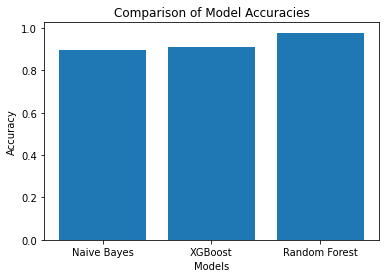

In [ ]:
#Bar plot for the Accuarcy to each model

plt.bar(model_names, Accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

plt.show()

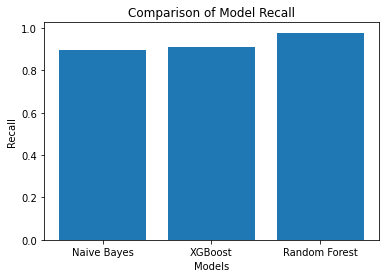

In [ ]:
#Bar plot for the Recall to each model

plt.bar(model_names, Recall)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Model Recall')

plt.show()

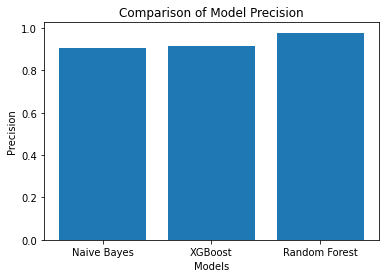

In [ ]:
#Bar plot for the Precision to each model

plt.bar(model_names, Precision)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Comparison of Model Precision')

plt.show()

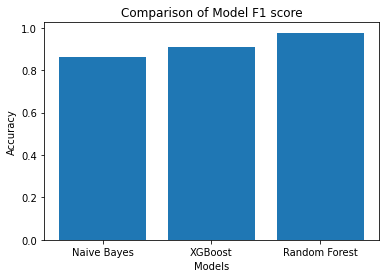

In [ ]:
#Bar plot for the F1 score to each model

plt.bar(model_names, F1_score)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model F1 score')

plt.show()

#**6 Graph Mining**

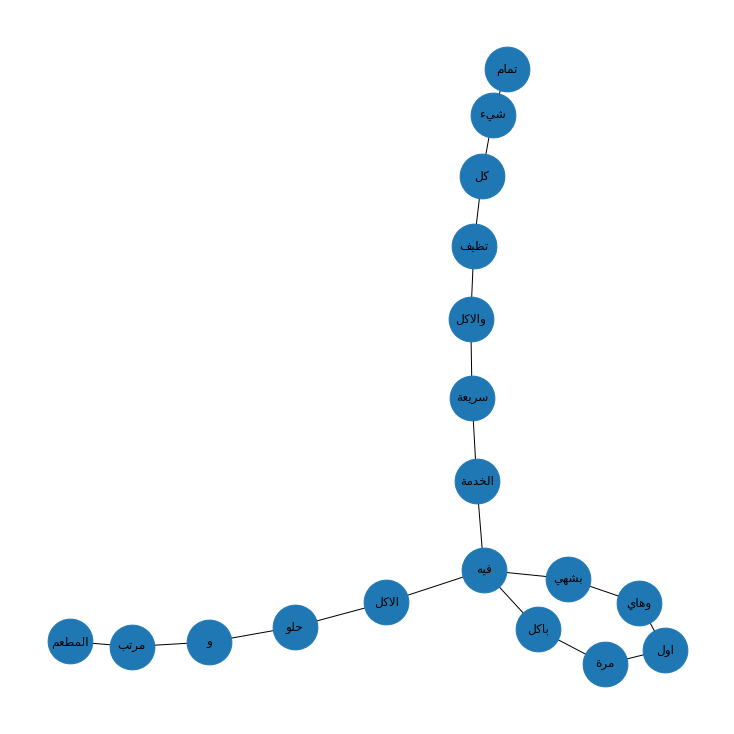

In [ ]:
# Create an empty graph
G = nx.Graph()

plt.figure(figsize=(10,10))

# Define the sentence
sentence = "المطعم مرتب و حلو ، الاكل فيه بشهي وهاي اول مرة. باكل فيه ، الخدمة سريعة والاكل تظيف كل شيء تمام"

# Use arabic_reshaper to correctly reshape the word
reshaped_sentence = arabic_reshaper.reshape(sentence)

# Use bidi.algorithm to get the correct display
display_sentence = get_display(reshaped_sentence)

# Use regular expressions to find all words in the sentence
words = re.findall(r'\b\w+\b', display_sentence)

# Add nodes to the graph
for word in words:
    G.add_node(word)

# Add edges between words
for i in range(len(words) - 1):
    G.add_edge(words[i], words[i+1])

# Draw the graph
nx.draw(G, with_labels=True,node_size=2000)
plt.show()